# Explore NC water withdrawal, discharge, transfer data

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Files
volumeFN = '../../Data/NCDEQ/MonthlyVolumeData.csv'
withdrawalFN = '../../Data/NCDEQ/WithdrawalSourceData.csv'
dischargeFN = '../../Data/NCDEQ/DischargeMethds.csv'
transferFN = '../../Data/NCDEQ/TransferInfo.csv'

## Volume

In [5]:
#Read in the data
dfVol = pd.read_csv(volumeFN,na_values='NaN')
dfVol.columns

Index(['SiteID', 'Year', 'Registrant', 'Facility', 'Type', 'County',
       'Subbasin', 'Month', '# of DaysUsed', 'Average DailyWithdrawal (MGD)',
       'Maximum DayWithdrawal (MGD)', '# of DaysDischarged',
       'Average DailyDischarge (MGD)', 'Maximum DayDischarge (MGD)',
       '# of DaysTransferred', 'Average DailyTransfer (MGD)',
       'Maximum DayTransfer (MGD)'],
      dtype='object')

In [6]:
#Create a list of sequential months (to sort plots)
monthList = dfVol.Month[0:12].values.tolist()

In [7]:
#Create a sorted list of years
yearList = dfVol['Year'].unique().tolist()
yearList.sort()
yearList

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

#### Withdrawal analysis

In [8]:
#Subset columns and remove records with zero days
cols = list(range(8)) + list(range(8,12))
dfWD = dfVol.iloc[:,cols][dfVol['# of DaysUsed'] > 0]
dfWD = dfWD[dfWD['# of DaysUsed'] > 0]

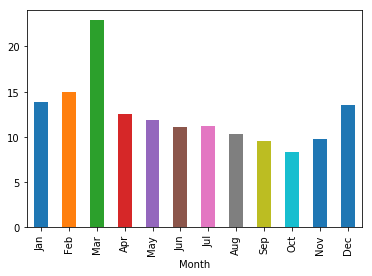

In [9]:
grpVar = 'Month'
showVar = 'Average DailyWithdrawal (MGD)'
byMonth = dfWD.groupby(grpVar)[showVar].mean()
byMonth[monthList].plot(kind='bar');

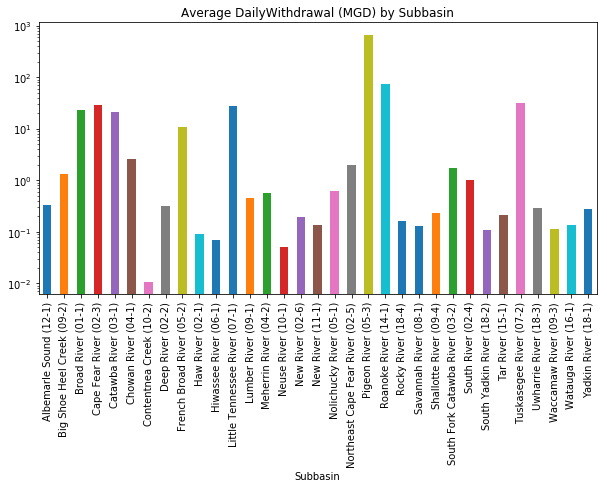

In [10]:
showVar = 'Average DailyWithdrawal (MGD)'
grpVar = 'Subbasin'
fig = plt.figure(figsize=(10,5))
dfWD.groupby(grpVar)[showVar].mean().plot(kind='bar',
                                          logy=True,
                                          title="{} by {}".format(showVar,grpVar));